- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
-  

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from ML_loader import DatasetLoader,ModelLoader


In [3]:
#Get data 
loader = DatasetLoader()
loader.read_dataset('./Dataset/features_resnet.csv',class_path='labelsDefault.txt',separator=',')
#loader.read_dataset('./partial_database.csv',class_path='labelsDefault.txt',separator=',')
loader.add_dataset(file_path='./Dataset/partial_database.csv')
loader.split_dataset()

#Normalize data, if not already normalized
print(np.shape(loader.X_train),np.shape(loader.X_test),np.shape(loader.y_train),np.shape(loader.y_test))

(4048, 273) (1012, 273) (4048,) (1012,)


In [4]:
#Get model
model = ModelLoader()
model.set_model(MultinomialNB())

cv = RepeatedStratifiedKFold(n_splits=22, n_repeats=3, random_state=1)

#Optimization 
param = {'alpha': np.linspace(0.5, 1.5, 6),
            'fit_prior': [True, False]}

model.set_optimal_params(param)

model.optimize(loader.X_train,loader.y_train,cv=cv,scoring='accuracy',n_iter=10)

#Train model with optimal params
model.set_model(MultinomialNB(**model.optimal_params))


Partial fit
Score accuracy group 0:  0.968944099378882
Score accuracy group learned 0:  0.968944099378882
Score accuracy global:  0.3102766798418972
Memory:  218.9140625 MB
Partial fit
Score accuracy group 1:  0.8043478260869565
Score accuracy group learned 0:  0.9627329192546584
Score accuracy group learned 1:  0.8043478260869565
Score accuracy global:  0.34189723320158105
Memory:  224.928125 MB
Partial fit
Score accuracy group 2:  0.8913043478260869
Score accuracy group learned 0:  0.9596273291925466
Score accuracy group learned 1:  0.8043478260869565
Score accuracy group learned 2:  0.8913043478260869
Score accuracy global:  0.3774703557312253
Memory:  231.02109375 MB
Partial fit
Score accuracy group 3:  0.782608695652174
Score accuracy group learned 0:  0.922360248447205
Score accuracy group learned 1:  0.8043478260869565
Score accuracy group learned 2:  0.8913043478260869
Score accuracy group learned 3:  0.782608695652174
Score accuracy global:  0.40019762845849804
Memory:  237.24

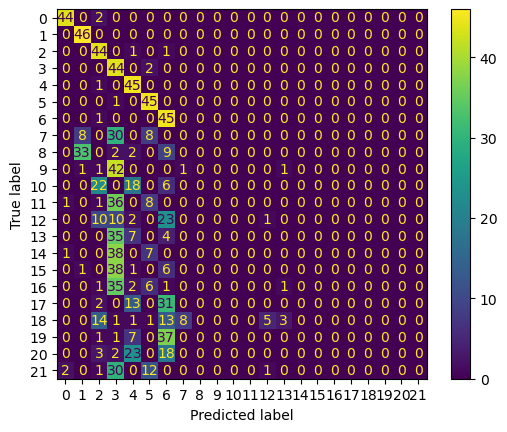

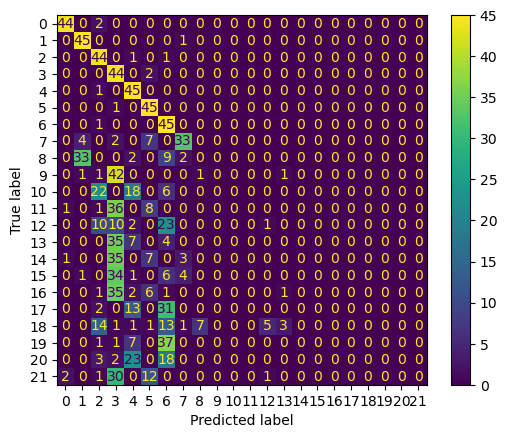

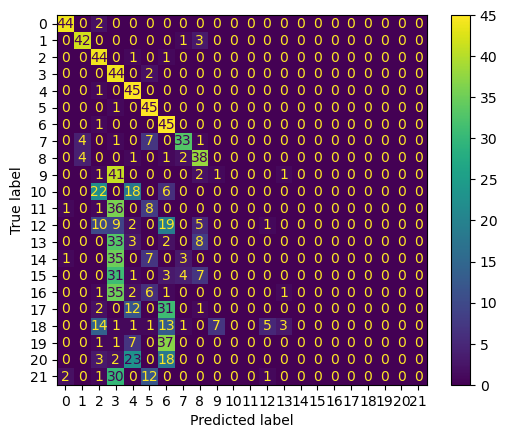

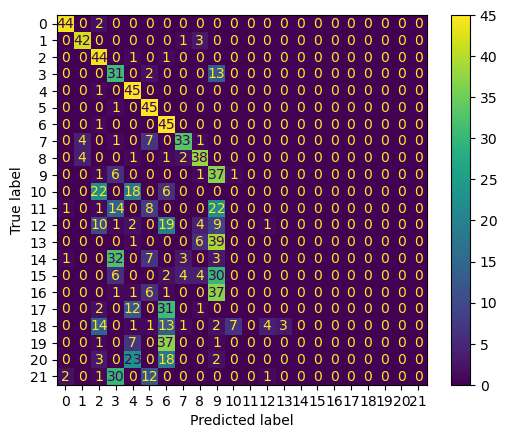

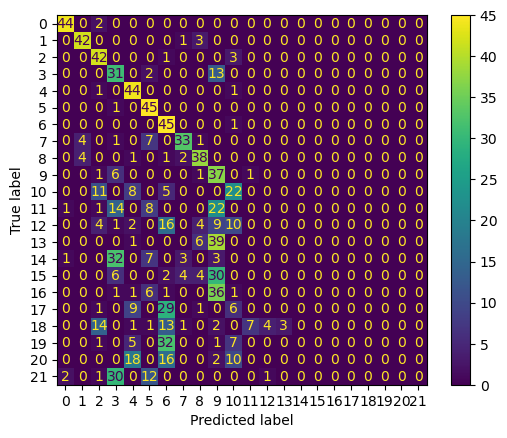

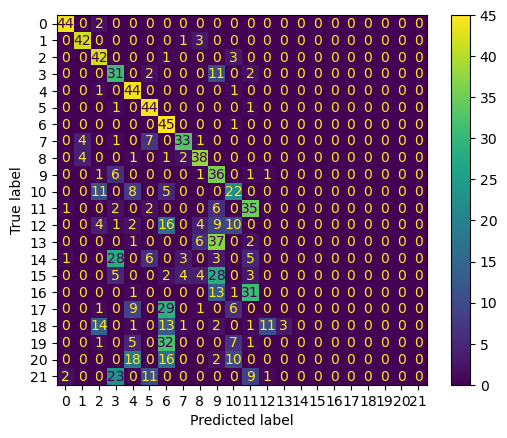

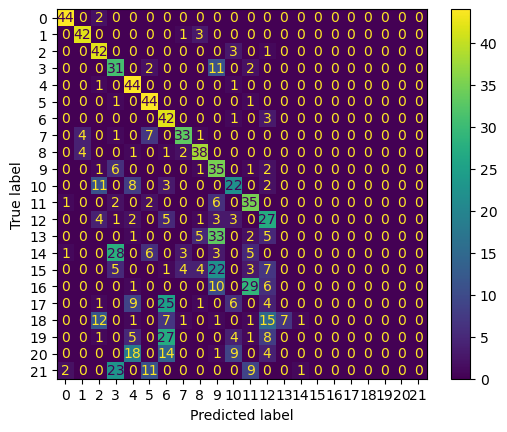

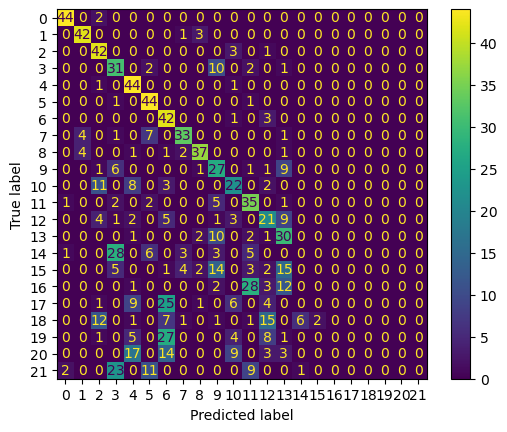

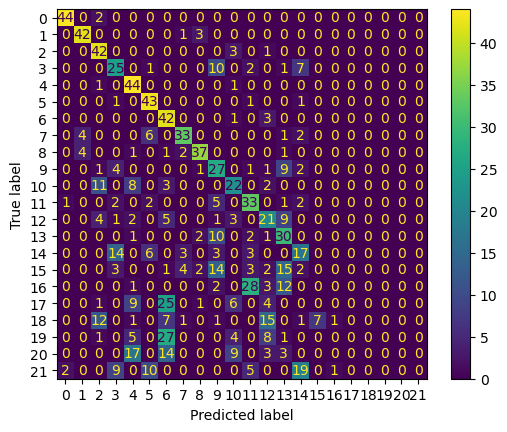

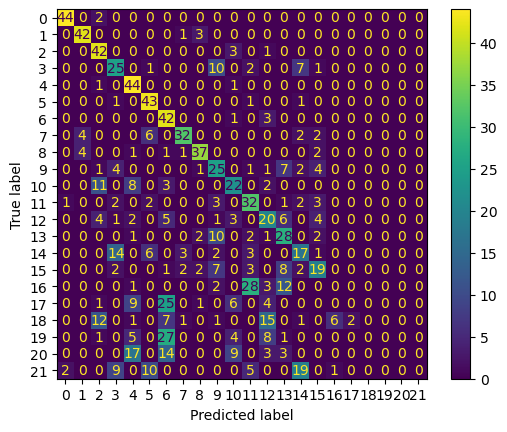

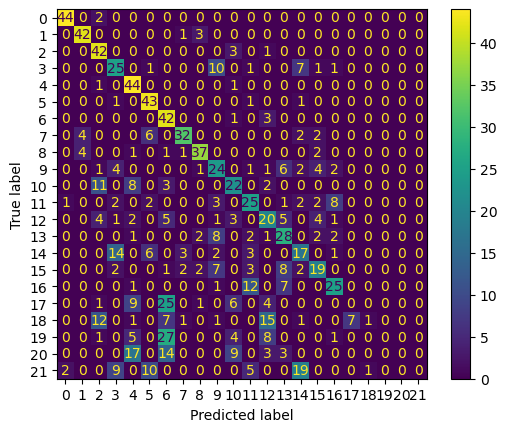

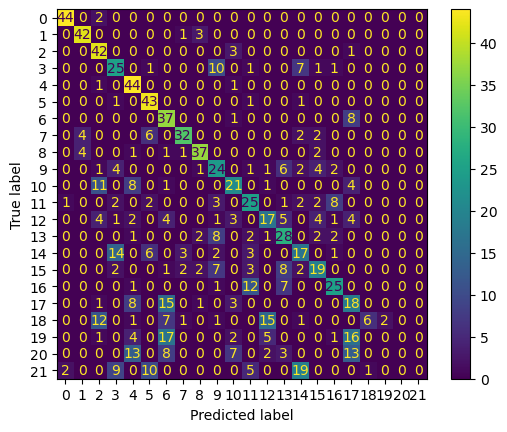

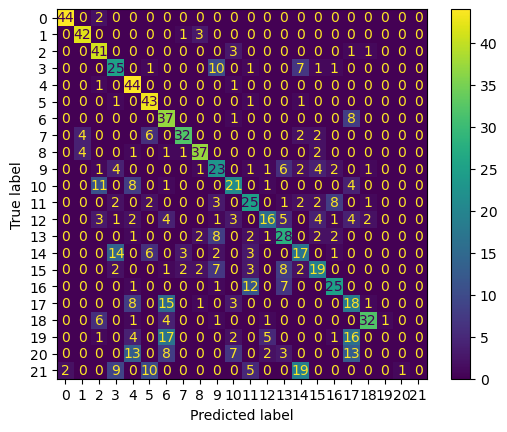

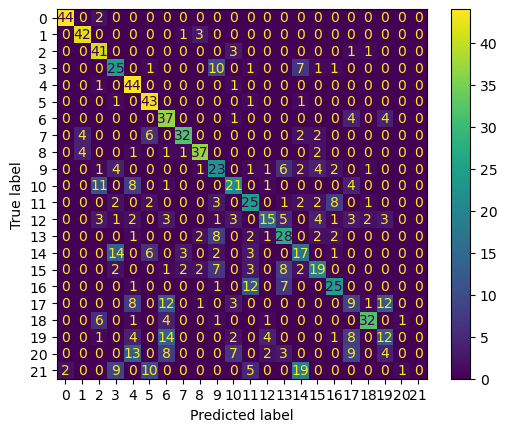

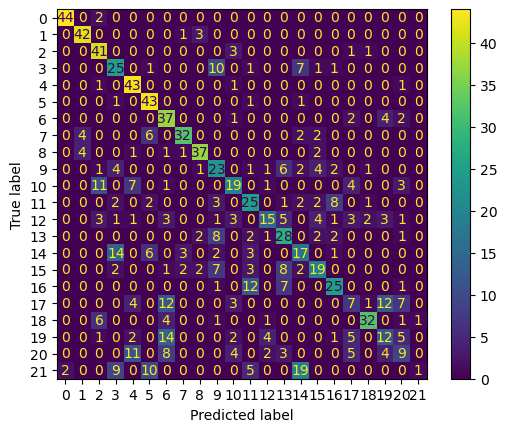

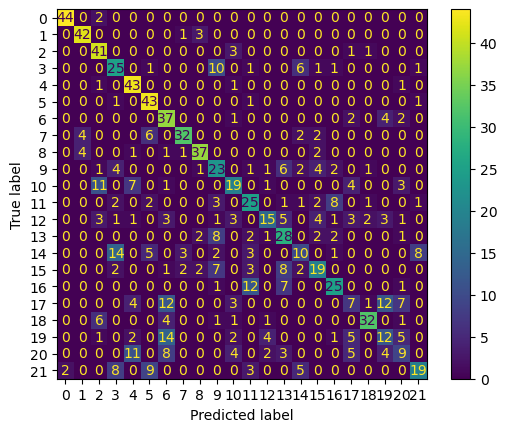

In [5]:
##Split by class, to increment by class:
class_to_group = {1:[1,2,3,4,5,6,7], 2:[8], 3:[9], 4:[10], 5:[11], 6:[12], 7:[13], 8:[14], 9:[15], 10:[16], 11:[17], 12:[18], 13:[19], 14:[20], 15:[21], 16:[22]}
X_train_merged, X_test_merged, y_train_merged, y_test_merged=loader.split_dataset_class(class_to_group,random_state=1)
memory_values = []
accuracy_learned_grouped = []


#Train model
for idx,(X_train,y_train,X_test,y_test) in enumerate(zip(X_train_merged,y_train_merged,X_test_merged,y_test_merged)):
    mem,res=model.partial_fit_train(X_train,y_train,classes=loader.classes)
    print(f"Score accuracy group {idx}: ",model.score(X_test,y_test))
    accuracy_learned = []
    for i in range(idx+1):
        print(f"Score accuracy group learned {i}: ",model.score(X_test_merged[i],y_test_merged[i]))
        accuracy_learned.append(model.score(X_test_merged[i],y_test_merged[i]))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))
    accuracy_learned_grouped.append(accuracy_learned)
    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")

In [6]:
#For learned class
df = pd.DataFrame(accuracy_learned_grouped)
df_bar = df.replace(np.nan, 0)
df_plot=df.T

#For accuracy global

df_global = pd.DataFrame(global_accuracy)
df_global.columns=['Global']
df_global_plot=df_global.T

#Line plot

fig, ax = plt.subplots()

for i in range(len(class_to_group)):
    ax.plot(list(df_plot.iloc[i]),label=f'Group {i+1}',marker='o')

ax.plot(list(df_global_plot.values[0]),label='Global',color='black',alpha=0.5,marker='o')
ax.set(xlabel='Number of learned groups', ylabel='Accuracy',
        title='Accuracy on learned groups')
ax.grid()
ax.legend()

#Bar plot 
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set(xlabel='Number of learned groups', ylabel='Accuracy',
        title='Accuracy on learned groups')

df_bar.plot(kind='bar', ax=ax)
df_global.plot(kind='bar', ax=ax, color='black', alpha=0.5, legend=False)
ax.legend(loc='lower right')

NameError: name 'global_accuracy' is not defined

Partial fit
Score accuracy batch 0:  0.5434782608695652
Score accuracy global:  0.5899209486166008
Memory:  453.3453125 MB
Partial fit
Score accuracy batch 1:  0.5770750988142292
Score accuracy global:  0.5928853754940712
Memory:  460.003125 MB
Partial fit
Score accuracy batch 2:  0.5770750988142292
Score accuracy global:  0.5938735177865613
Memory:  466.6675866168478 MB
Partial fit
Score accuracy batch 3:  0.575098814229249
Score accuracy global:  0.5958498023715415
Memory:  471.98203125 MB
Partial fit
Score accuracy batch 4:  0.5691699604743083
Score accuracy global:  0.5958498023715415
Memory:  436.90347272398844 MB
Partial fit
Score accuracy batch 5:  0.5711462450592886
Score accuracy global:  0.5928853754940712
Memory:  438.67065755208336 MB
Partial fit
Score accuracy batch 6:  0.567193675889328
Score accuracy global:  0.5938735177865613
Memory:  439.00660211267603 MB
Partial fit
Score accuracy batch 7:  0.5612648221343873
Score accuracy global:  0.5958498023715415
Memory:  440.09

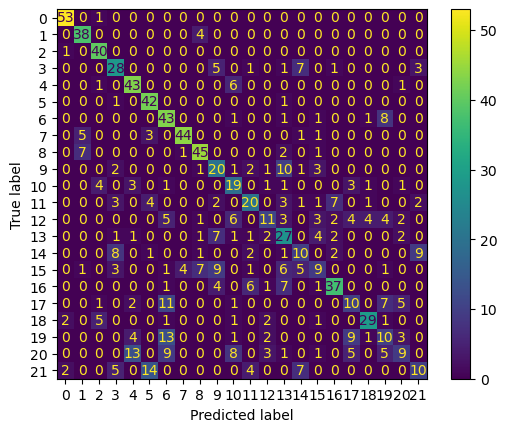

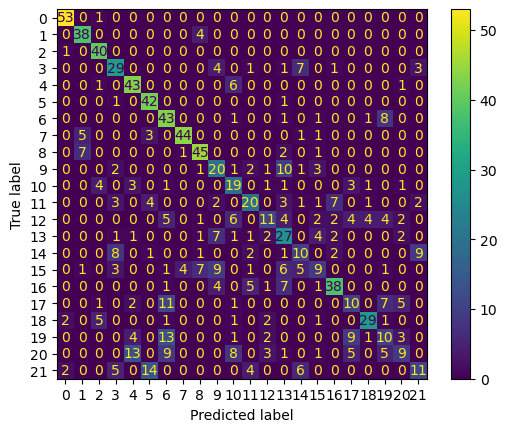

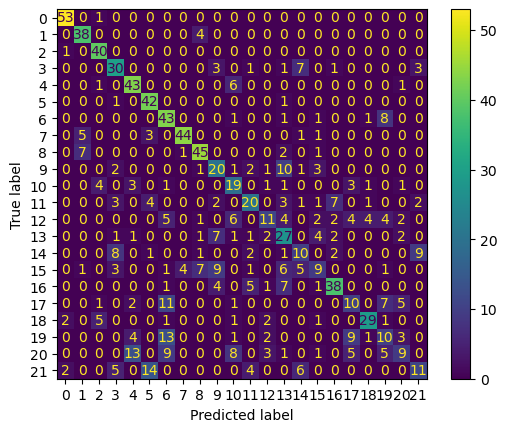

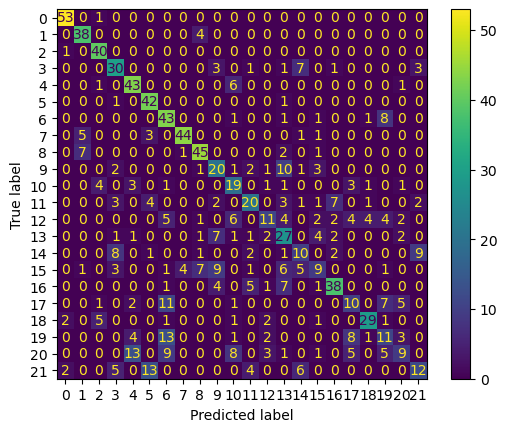

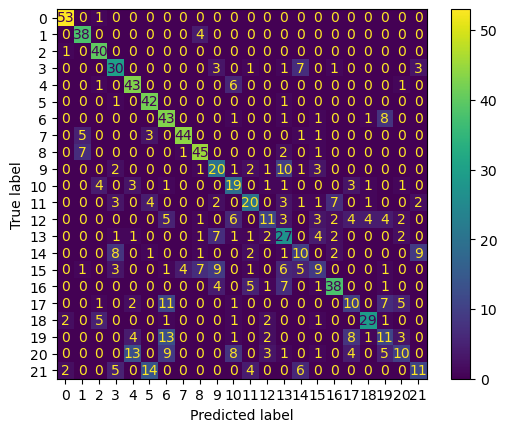

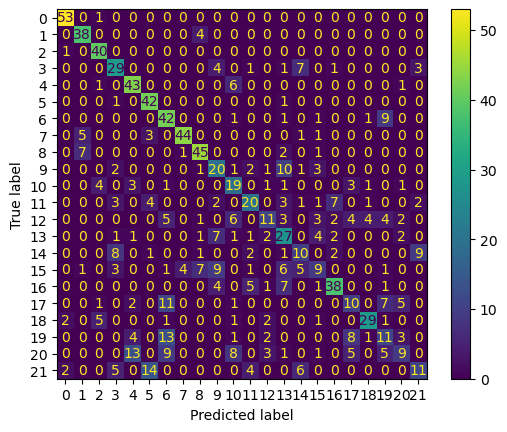

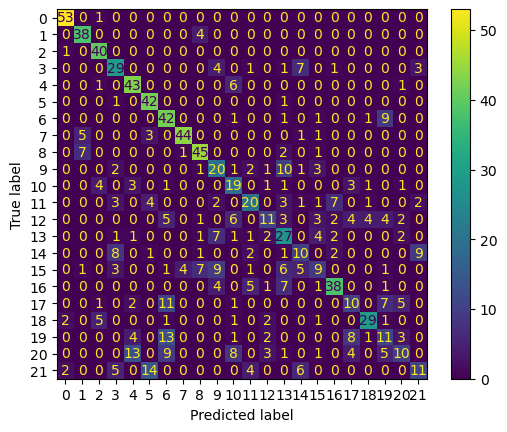

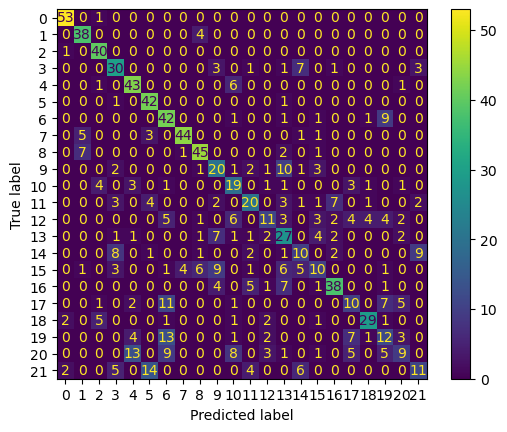

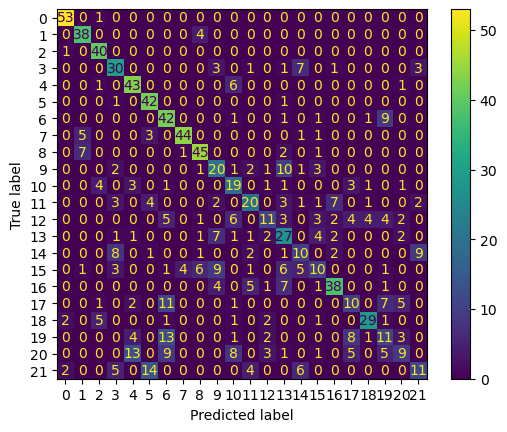

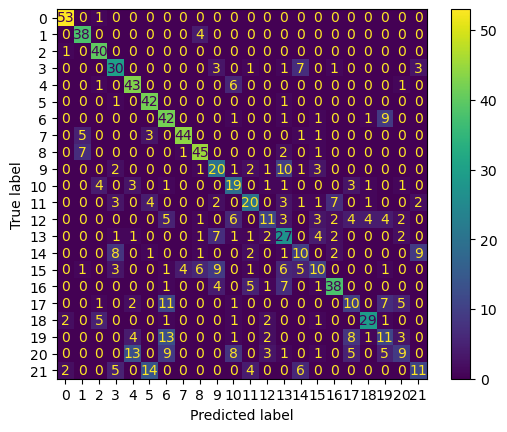

In [ ]:
X_train_split_data,y_train_split_data,X_test_split_data,y_test_split_data=loader.split_dataset_data(10,random_state=1)
memory_values = []

for x in range(len(X_train_split_data)):
    mem,res=model.partial_fit_train(X_train_split_data[x],y_train_split_data[x],classes=loader.classes)
    print(f"Score accuracy batch {x}: ",model.score(X_test_split_data[x],y_test_split_data[x]))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))

    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")